# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of data
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
df.sample(15, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32000,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30000,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24000,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00000,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00000,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82000,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00000,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00000,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55000,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [5]:
data = df.copy()

<IPython.core.display.Javascript object>

In [6]:
# check the data types of the columns and the number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [7]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# checking for missing values in the data.
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
data.drop(["Booking_ID"], axis=1, inplace=True)
# drop the booking id column as it will not be used

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [10]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


<IPython.core.display.Javascript object>

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on lead time

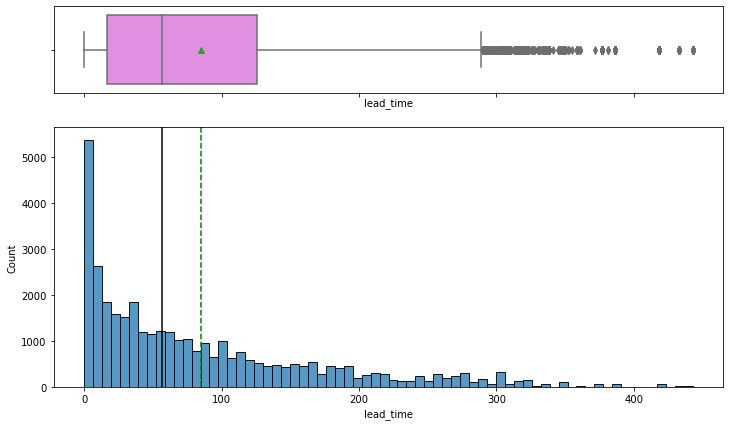

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "lead_time")

### Observations on average price per room

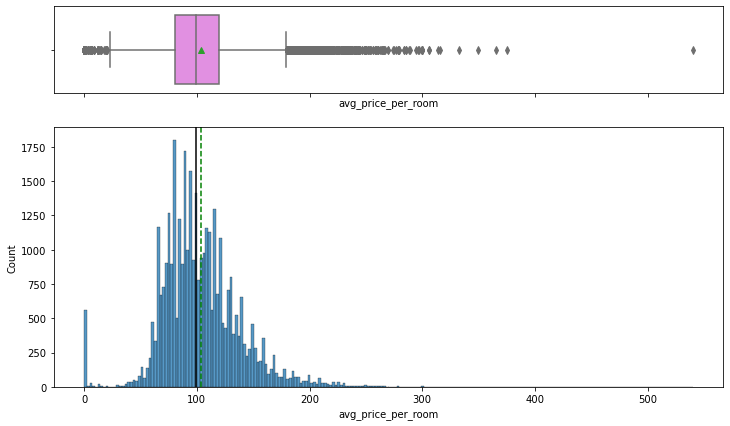

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(
    data, "avg_price_per_room"
)  ##  create histogram_boxplot for average price per room

In [14]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [15]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(
    0.25
)  ##  calculating 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

80.3

<IPython.core.display.Javascript object>

In [17]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

### Observations on number of previous booking cancellations

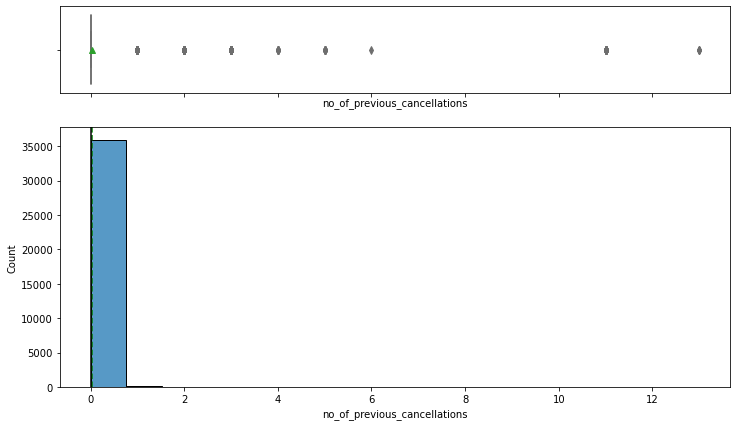

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(
    data, "no_of_previous_cancellations"
)  ##  create histogram_boxplot for number of previous booking cancellations

### Observations on number of previous booking not canceled

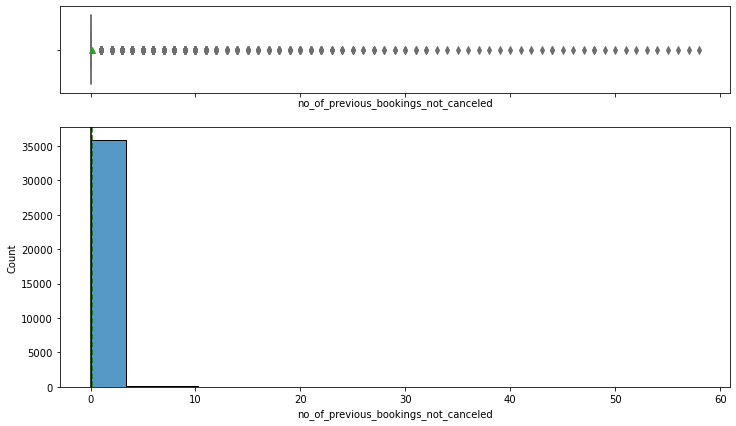

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(
    data, "no_of_previous_bookings_not_canceled"
)  ## create histogram_boxplot for number of previous booking not canceled

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on number of adults

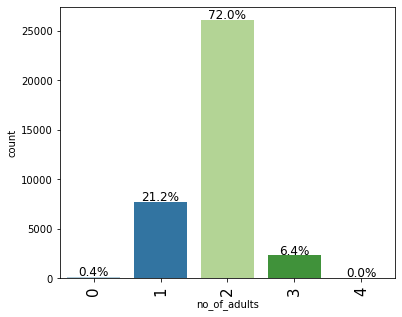

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "no_of_adults", perc=True)

### Observations on number of children

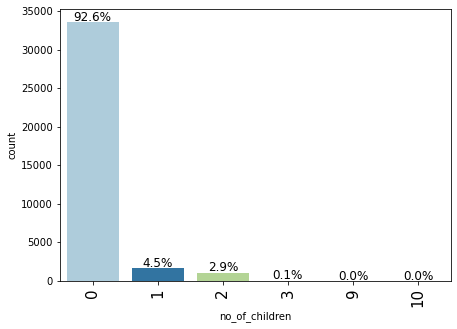

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(
    data, "no_of_children", perc=True
)  ##  create labeled_barplot for number of children

In [23]:
# checking instances where number of children is more than 3 to see how it affects the data
data[data["no_of_children"] > 3]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6338,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45000,1,Not_Canceled
10041,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00000,0,Not_Canceled
10061,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50000,1,Canceled


<IPython.core.display.Javascript object>

In [24]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

### Observations on number of week nights

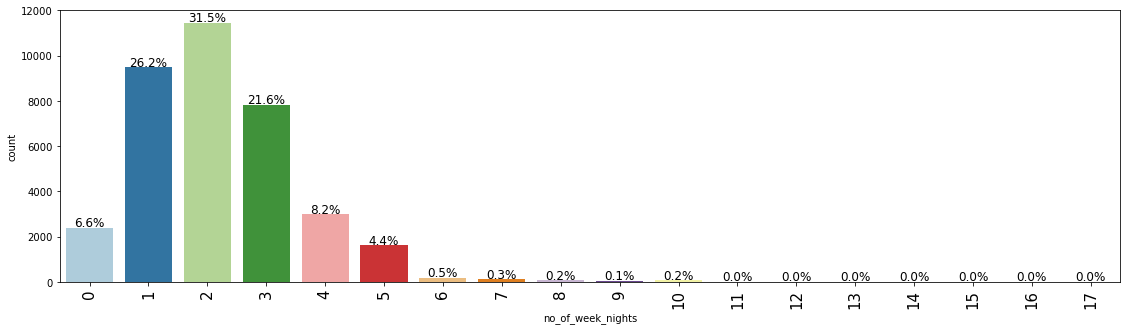

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(
    data, "no_of_week_nights", perc=True
)  ##  create labeled_barplot for number of week nights

### Observations on number of weekend nights

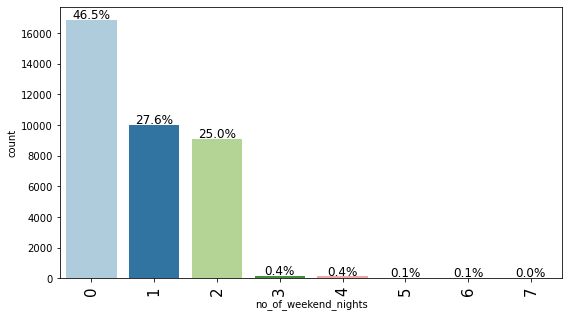

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(
    data, "no_of_weekend_nights", perc=True
)  ##  create labeled_barplot for number of weekend nights

### Observations on required car parking space

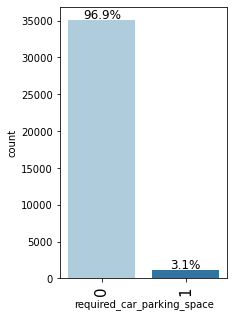

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(
    data, "required_car_parking_space", perc=True
)  ##  create labeled_barplot for car parking space

### Observations on type of meal plan

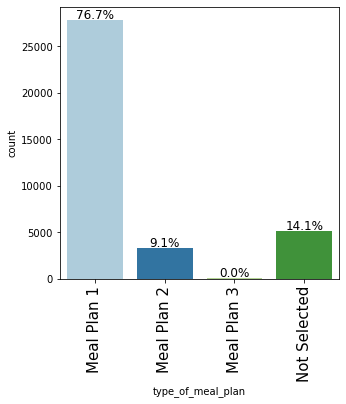

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(
    data, "type_of_meal_plan", perc=True
)  ##  create labeled_barplot for type of mean plan

### Observations on room type reserved

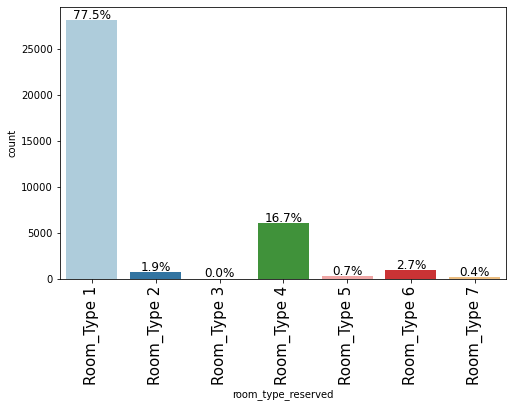

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(
    data, "room_type_reserved", perc=True
)  ## create labeled_barplot for room type reserved

### Observations on arrival month

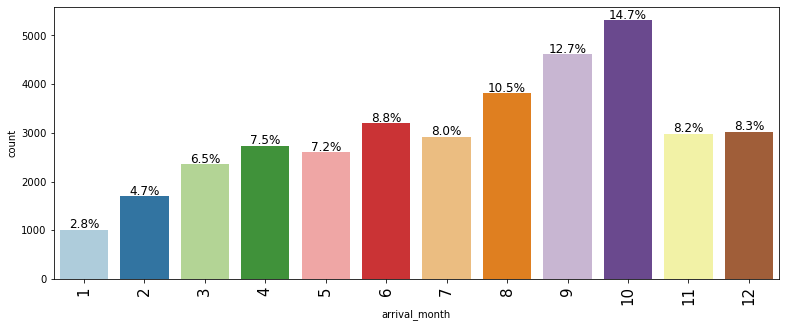

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(
    data, "arrival_month", perc=True
)  ##  create labeled_barplot for arrival month

### Observations on market segment type

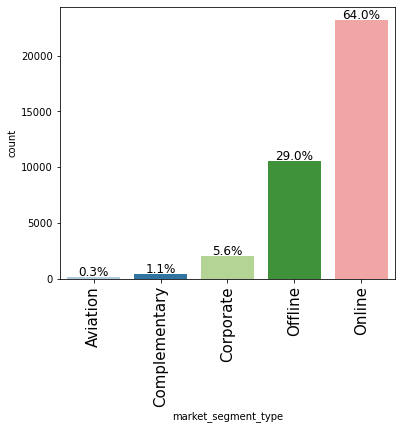

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(
    data, "market_segment_type", perc=True
)  ##  create labeled_barplot for market segment type

### Observations on number of special requests

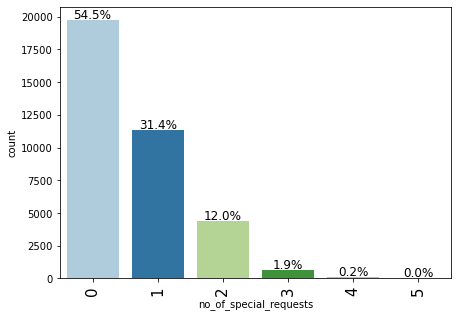

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(
    data, "no_of_special_requests", perc=True
)  ## create labeled_barplot for number of special requests

### Observations on booking status

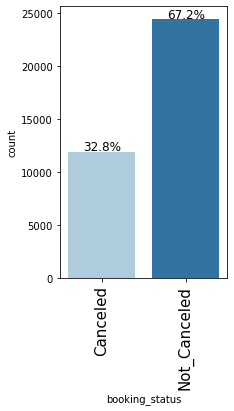

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(
    data, "booking_status", perc=True
)  ##  create labeled_barplot for booking status

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [34]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

### Bivariate Analysis

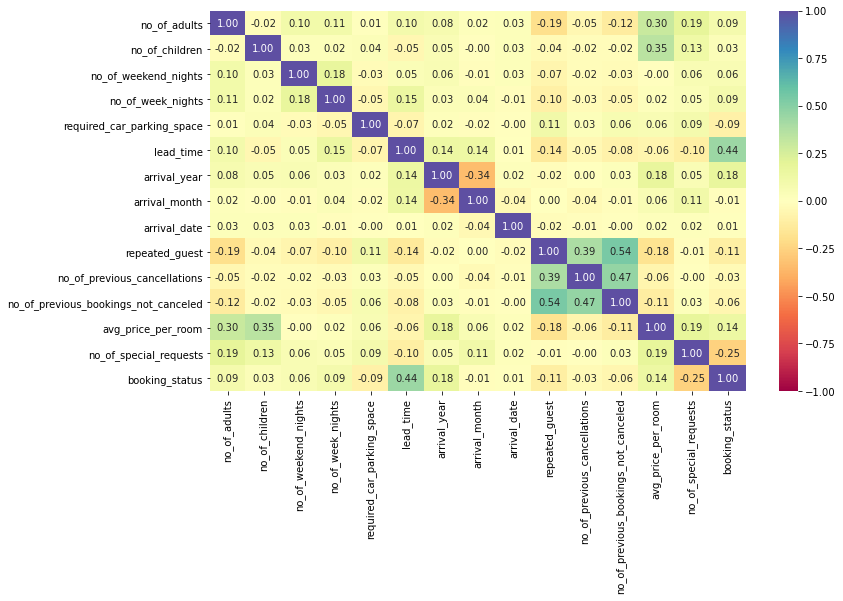

<IPython.core.display.Javascript object>

In [35]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

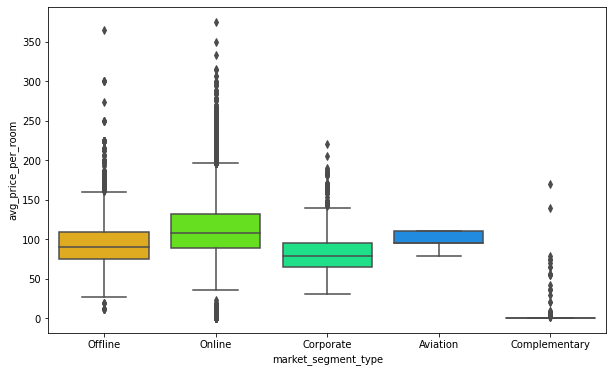

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


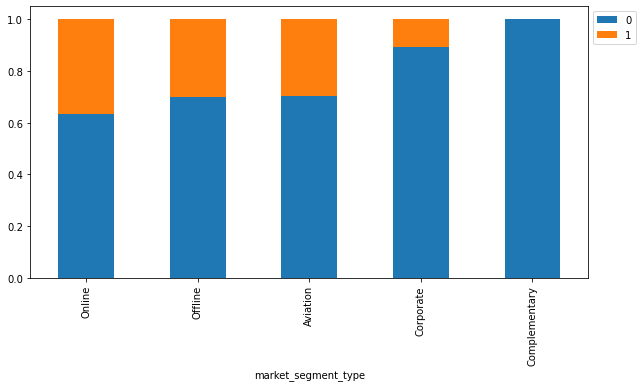

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "market_segment_type", "booking_status")

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


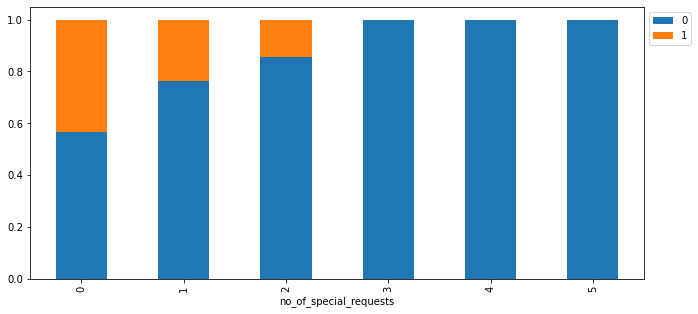

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(
    data, "no_of_special_requests", "booking_status"
)  ## plot stacked barplot for no of special requests and booking status

**Let's see if the special requests made by the customers impacts the prices of a room**

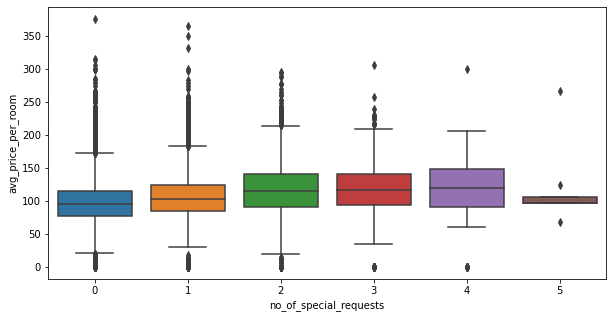

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room"
)  ##  boxplot for no of special requests and average price per room (excluding the outliers)
plt.show()

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

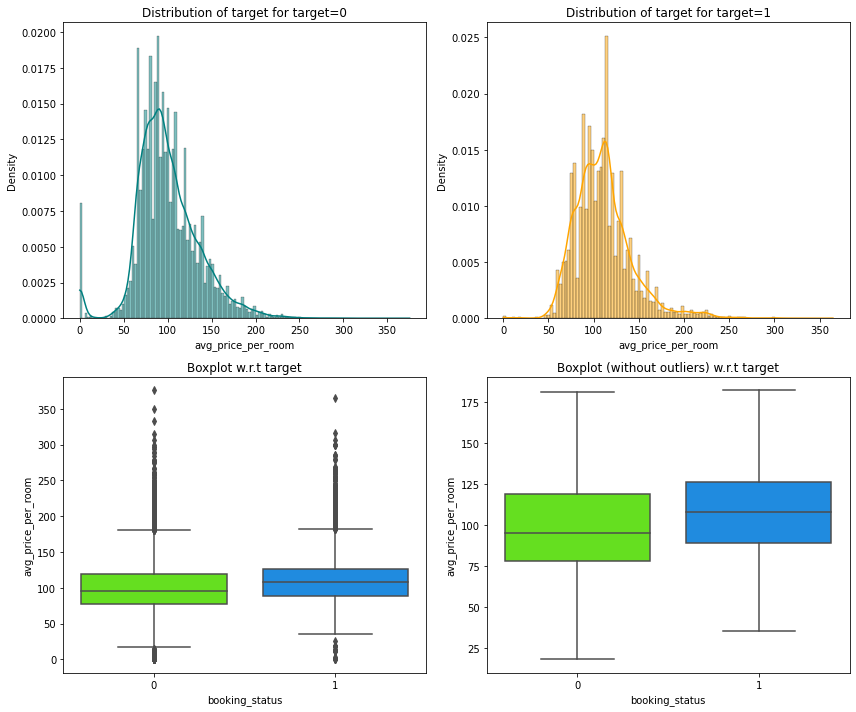

<IPython.core.display.Javascript object>

In [42]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

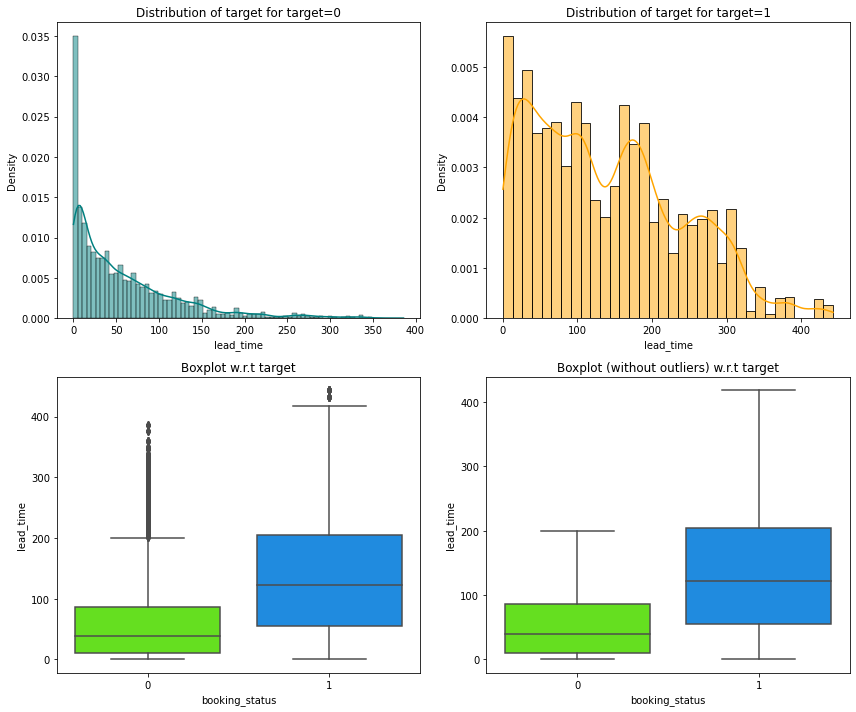

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(
    data, "lead_time", "booking_status"
)  ##  find distribution of lead time wrt booking status

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [44]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [45]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

In [46]:
family_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,0,3
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,1,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,0,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,1,2


<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


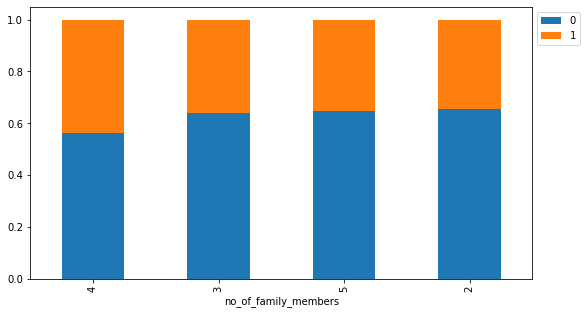

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(
    family_data, "no_of_family_members", "booking_status"
)  ##  plot stacked barplot for no of family members and booking status

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [48]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [49]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

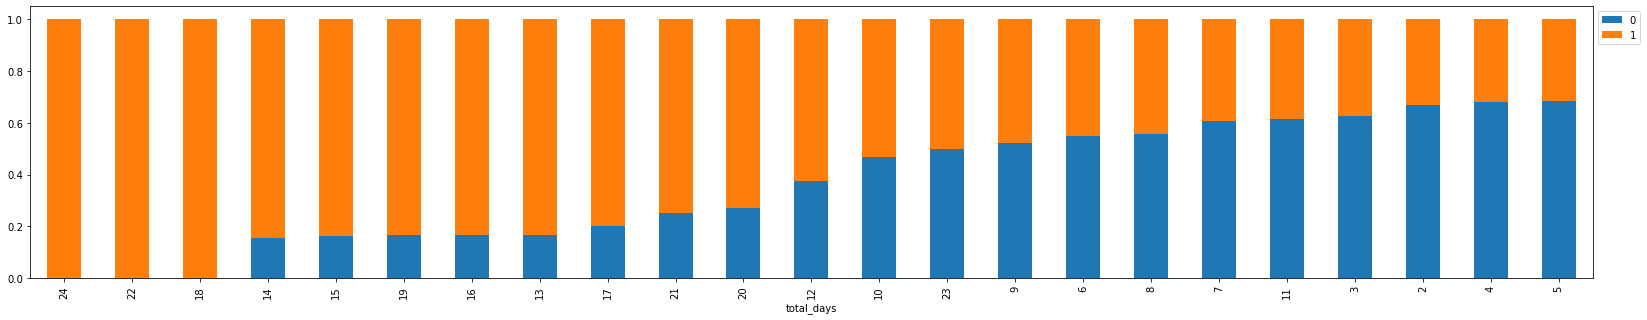

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(
    stay_data, "total_days", "booking_status"
)  ##  plot stacked barplot for total days and booking status

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


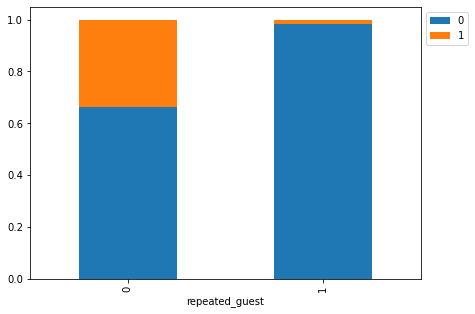

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(
    data, "repeated_guest", "booking_status"
)  ## plot stacked barplot for repeated guests and booking status

**Let's find out what are the busiest months in the hotel.**

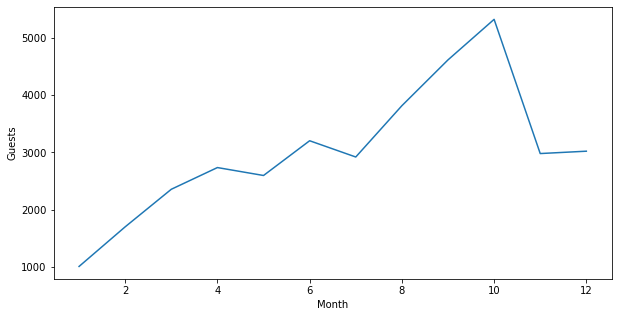

<IPython.core.display.Javascript object>

In [52]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


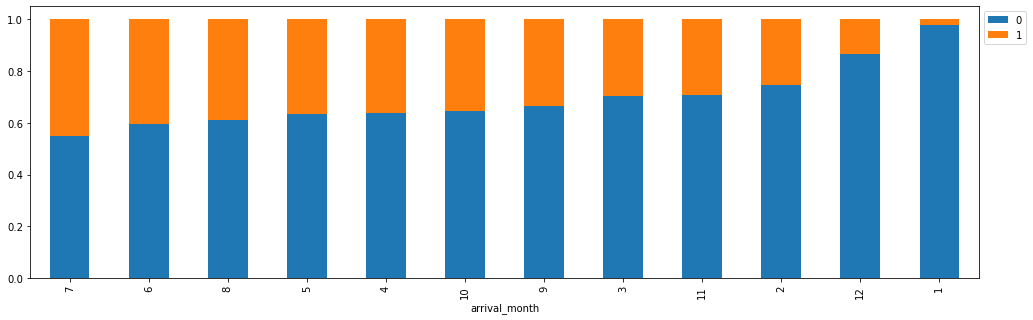

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(
    data, "arrival_month", "booking_status"
)  ##  plot stacked barplot for arrival month and booking status

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

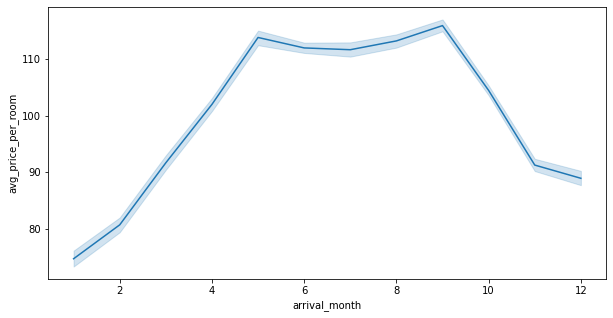

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=data, x="arrival_month", y="avg_price_per_room"
)  ##   lineplot between average price per room and arrival month
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Variable Transformation

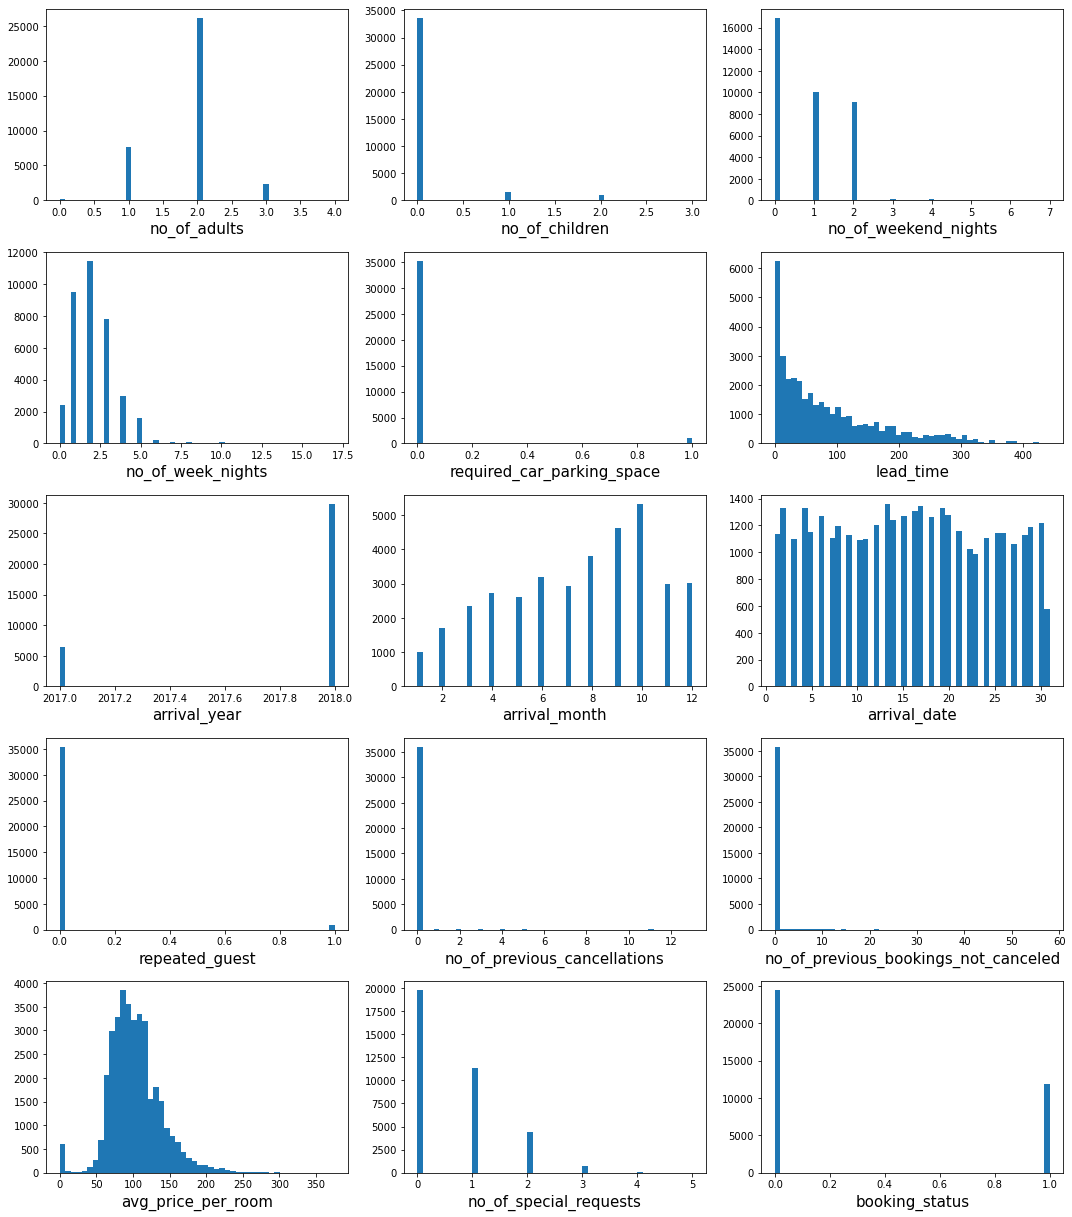

<IPython.core.display.Javascript object>

In [55]:
# creating a list of numerical columns
dist_cols = [item for item in data.select_dtypes(include=np.number).columns]


# let's plot a histogram of all columns

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

In [56]:
dist_cols1 = ["lead_time"]

data1 = data.copy()

# applying log transform
for col in dist_cols1:
    data1[col + "_log"] = np.log(data1[col] + 1)

# dropping the original lead time column
data1.drop(dist_cols1, axis=1, inplace=True)
data1.head()  # check new dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,lead_time_log
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,65.00000,0,0,5.41610
1,2,0,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,106.68000,1,0,1.79176
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,60.00000,0,1,0.69315
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,100.00000,0,1,5.35659
4,2,0,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,94.50000,0,1,3.89182


<IPython.core.display.Javascript object>

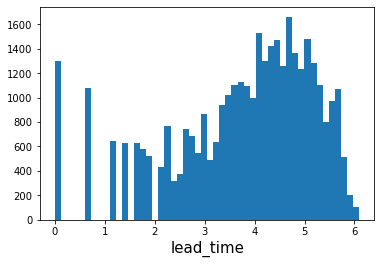

<IPython.core.display.Javascript object>

In [57]:
new_dist_cols = [item + "_log" for item in dist_cols1]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols1)):
    plt.subplot(9, 3, i + 1)
    plt.hist(data1[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols1[i], fontsize=15)

plt.show()

### Outlier Check

- Let's check for outliers in the data.

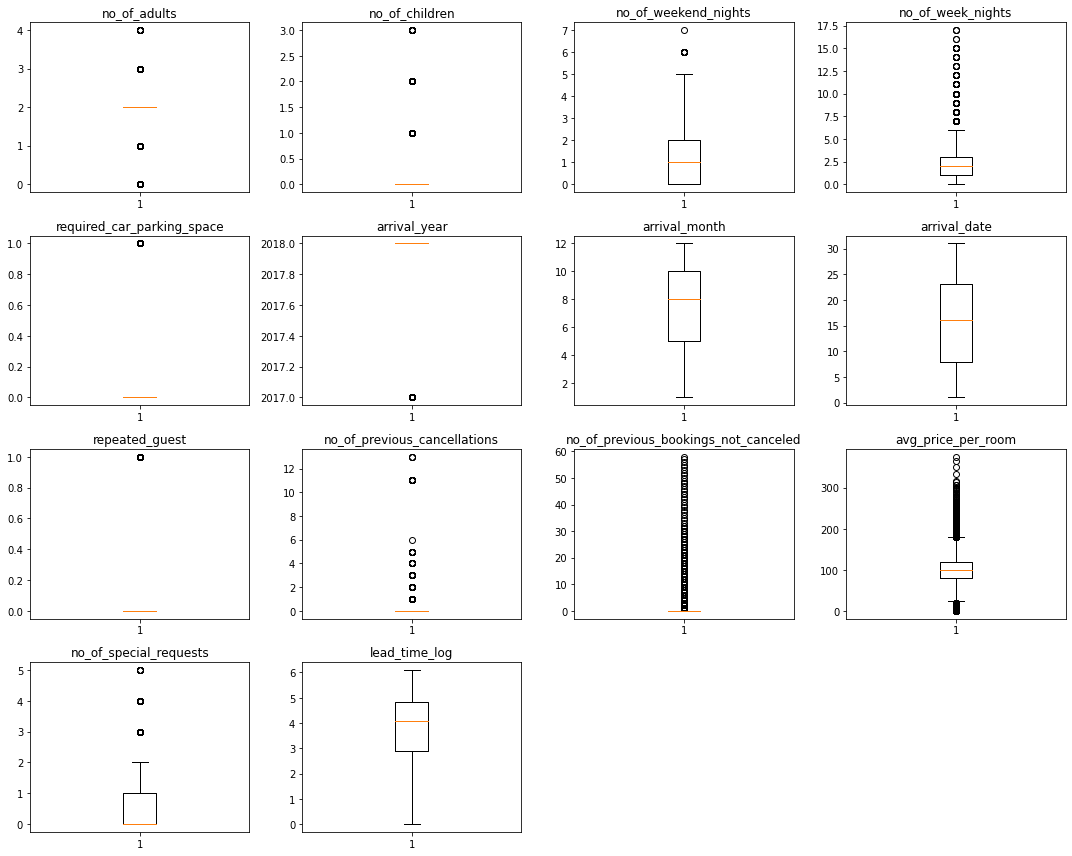

<IPython.core.display.Javascript object>

In [58]:
# outlier detection using boxplot
numeric_columns = data1.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

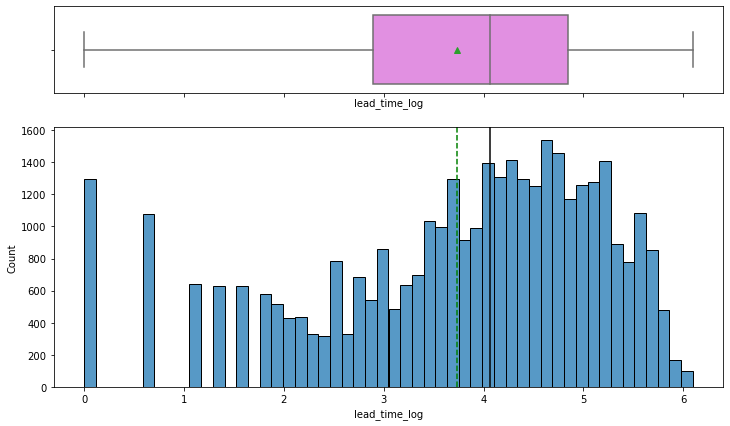

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(data1, "lead_time_log")

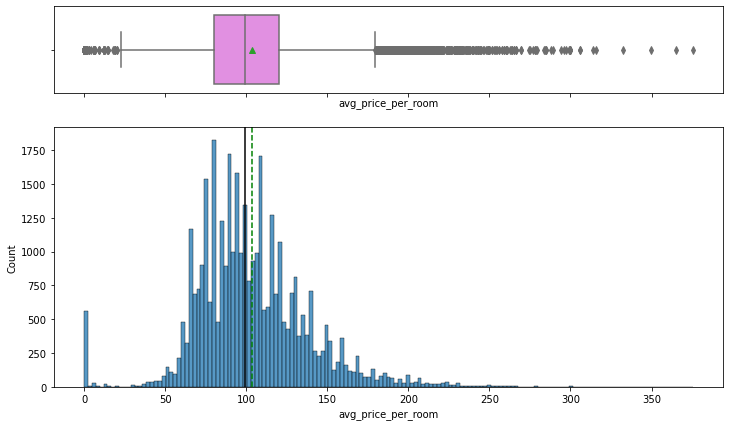

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(data1, "avg_price_per_room")

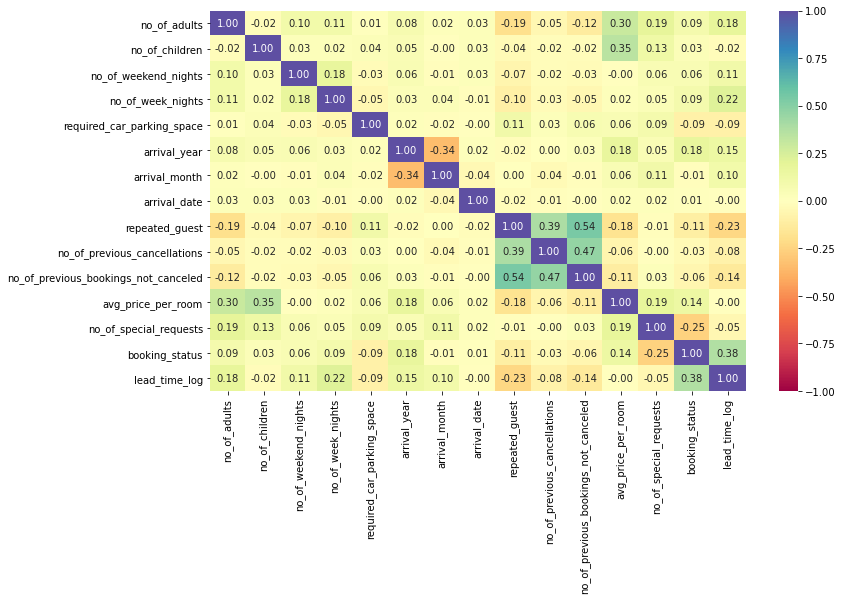

<IPython.core.display.Javascript object>

In [61]:
cols_list = data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`booking_status`) is of *category* type.
- Columns like `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` are also of *object* type.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are no missing values in the data.




**Data Cleaning:**

- The `Booking_ID` column was dropped since its of no use in the modeling
- The `lead_time` column is heavily skewed.
- Log transform has been applied to reduce the extreme skewness.
- The `avg_price_per_room` colmun appears normal but has outliers and outliers with average price greater than 500 were treated by replacing them with the upper whisker value of 80.30
- There were 3 cases where number of children in a booking is 9 and 10 which is extremely high and likely to be an error. These values were replace with 3 children


**Observations from EDA:**

- There were 545 bookings with no price and these are split between online (191 bookings) and complemetary (354 bookings) market segments
- 72% of bookings were made by 2 adults and 96% of people who book have no children 
- Most (96%) bookings do not require parking space
- October is the busiest month followed by September and then August
- Most guests (64%) come from the online market segment 
- Median price is higher for online market segments followed by offline segments and its lowest for complementary market segment
- 32.8% of bookings get cancelled
- 16 out of 930 repeated guests cancelled. This is 1.72%
- The more the special requests the lower the cancelations on bookings
- The number of guest incerease and the year goes by and declines after october

## Building a Logistic Regression model

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [62]:
X = data1.drop(["booking_status"], axis=1)
Y = data1["booking_status"]

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## create dummies for X

# adding constant
X = sm.add_constant(X)

X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,2017,10,2,0,0,0,65.00000,0,5.41610,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,2018,11,6,0,0,0,106.68000,1,1.79176,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,2018,2,28,0,0,0,60.00000,0,0.69315,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,2018,5,20,0,0,0,100.00000,0,5.35659,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,2018,4,11,0,0,0,94.50000,0,3.89182,0,0,1,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [63]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
##  split the data into train test in the ratio 70:30 with random_state = 1

<IPython.core.display.Javascript object>

In [64]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [66]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [67]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3047
Time:                        00:33:20   Log-Likelihood:                -11188.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1530.0672    117.582    -13.013      0.000   -1760.523   -1299.611
no_of_adults                             0.0759      

<IPython.core.display.Javascript object>

In [68]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79458,0.62095,0.71736,0.66568


<IPython.core.display.Javascript object>

### Multicollinearity

In [69]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [70]:
checking_vif(X_train)

,feature,VIF
0,const,38437016.80103
1,no_of_adults,1.36526
2,no_of_children,2.09472
3,no_of_weekend_nights,1.07151
4,no_of_week_nights,1.11374
5,required_car_parking_space,1.04056
6,arrival_year,1.39359
7,arrival_month,1.24400
8,arrival_date,1.00649
9,repeated_guest,1.79349


<IPython.core.display.Javascript object>

In [71]:
X_train1 = X_train.drop(
    "market_segment_type_Online", axis=1
)  # remove variable with highest VIF and check
checking_vif(X_train1)

,feature,VIF
0,const,38327380.15272
1,no_of_adults,1.35123
2,no_of_children,2.09390
3,no_of_weekend_nights,1.07089
4,no_of_week_nights,1.11260
5,required_car_parking_space,1.04047
6,arrival_year,1.39001
7,arrival_month,1.24255
8,arrival_date,1.00648
9,repeated_guest,1.79101


<IPython.core.display.Javascript object>

* None of the variables exhibit high multicollinearity, so the values in the summary are reliable.
* Let's remove the insignificant features (p-value>0.05).


In [72]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3039
Time:                        00:33:25   Log-Likelihood:                -11201.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1559.0624    117.324    -13.288      0.000   -1789.014   -1329.111
no_of_adults                             0.0565      

<IPython.core.display.Javascript object>

In [73]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79517,0.62119,0.71873,0.66641


<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [74]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'required_car_parking_space', 'arrival_year', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'lead_time_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [75]:
X_train2 = X_train1[selected_features]
X_test2 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [76]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.3030
Time:                        00:33:27   Log-Likelihood:                -11215.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1554.1465    110.465    -14.069      0.000   -1770.654   -1337.639
no_of_weekend_nights               0.0708      0.019      3.723      0.

<IPython.core.display.Javascript object>

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [77]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_weekend_nights,required_car_parking_space,arrival_year,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,lead_time_log,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.07333,0.21826,2.15451,0.10211,1.31071,1.01844,0.23217,2.64908,1.53261,1.28557,0.78723,0.65666,0.45655,0.51427,0.27881,0.47246,0.20668
Change_odd%,-100.00000,7.33318,-78.17400,115.45127,-89.78941,31.07090,1.84389,-76.78323,164.90811,53.26110,28.55675,-21.27725,-34.33400,-54.34547,-48.57264,-72.11866,-52.75386,-79.33232


<IPython.core.display.Javascript object>

#### Checking model performance on the training set

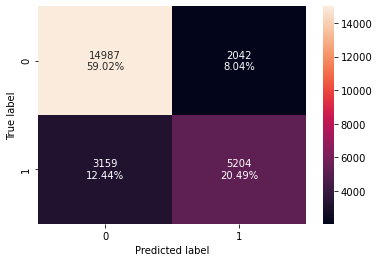

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [79]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)  ##  check performance on X_train2 and y_train
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79517,0.62226,0.71819,0.66679


<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on training set

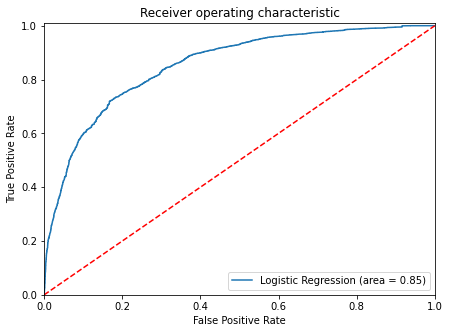

<IPython.core.display.Javascript object>

In [80]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [81]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.42278339650675023


<IPython.core.display.Javascript object>

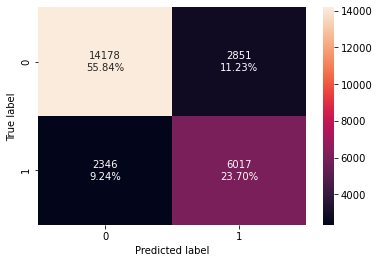

<IPython.core.display.Javascript object>

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)  ## create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold

In [83]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79533,0.71948,0.67851,0.69839


<IPython.core.display.Javascript object>

#### Let's use Precision-Recall curve and see if we can find a better threshold

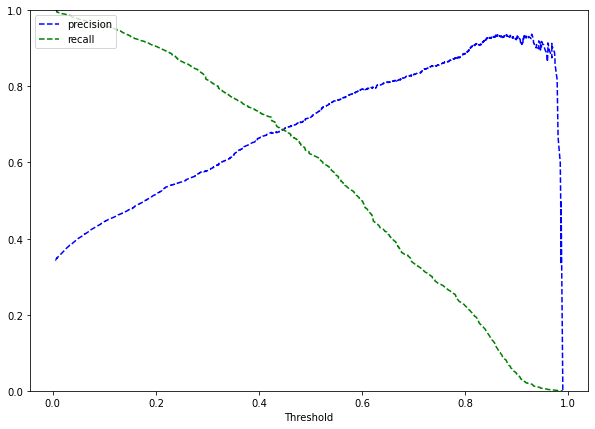

<IPython.core.display.Javascript object>

In [84]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [85]:
# setting the threshold
optimal_threshold_curve = 0.41

<IPython.core.display.Javascript object>

#### Checking model performance on training set

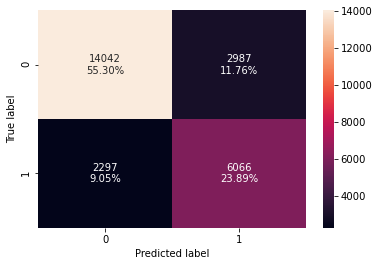

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)  ##  create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [87]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79182,0.72534,0.66991,0.69652


<IPython.core.display.Javascript object>

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.42 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.42 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.79517,0.79533,0.79182
Recall,0.62226,0.71948,0.72534
Precision,0.71819,0.67851,0.66991
F1,0.66679,0.69839,0.69652


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Using model with default threshold**

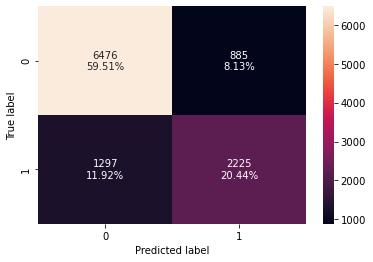

<IPython.core.display.Javascript object>

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_test2, y_test
)  ##  create confusion matrix for X_test1 and y_test

In [90]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)  ##  check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79950,0.63174,0.71543,0.67099


<IPython.core.display.Javascript object>

* ROC curve on test set

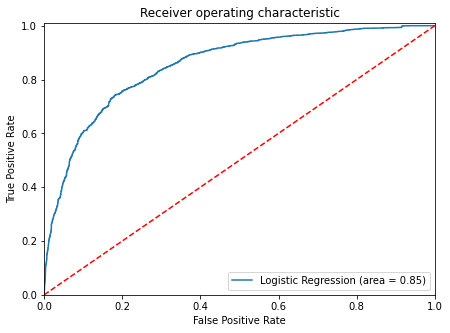

<IPython.core.display.Javascript object>

In [91]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.42** 

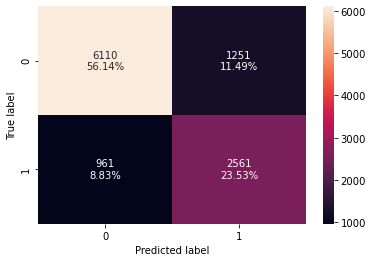

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)  ##  create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [93]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79675,0.72714,0.67183,0.69839


<IPython.core.display.Javascript object>

**Using model with threshold = 0.41**

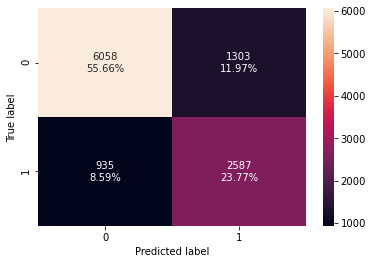

<IPython.core.display.Javascript object>

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)  ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [95]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79436,0.73453,0.66504,0.69806


<IPython.core.display.Javascript object>

### Model performance summary

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.42 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.42 Threshold,Logistic Regression-0.41 Threshold
Accuracy,0.79950,0.79675,0.79436
Recall,0.63174,0.72714,0.73453
Precision,0.71543,0.67183,0.66504
F1,0.67099,0.69839,0.69806


<IPython.core.display.Javascript object>

## Decision Tree

In [97]:
X = data1.drop(["booking_status"], axis=1)
Y = data1["booking_status"]

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ##  create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1
)  ##  split the data into train test in the ratio 70:30 with random_state = 1

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [99]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [100]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ##  fit decision tree on train data

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

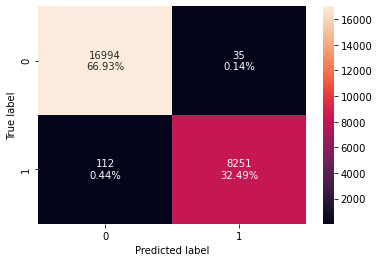

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  ##  create confusion matrix for train data

In [102]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking model performance on test set

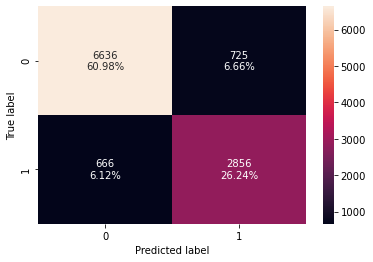

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  ##  create confusion matrix for test data

In [104]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)  ##  check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87219,0.81090,0.79754,0.80417


<IPython.core.display.Javascript object>

**Before pruning the tree let's check the important features.**

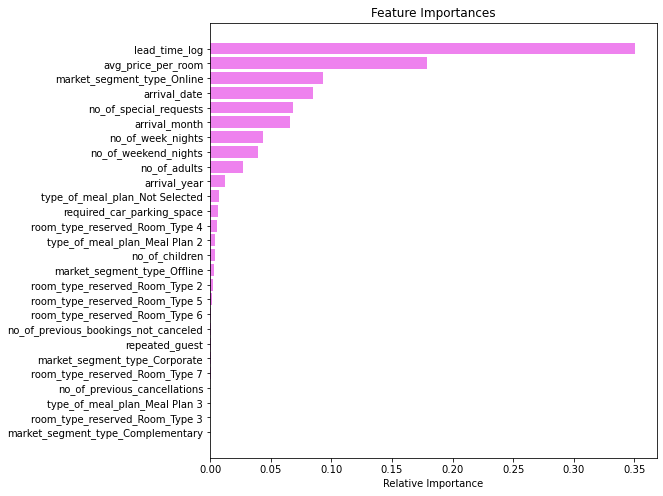

<IPython.core.display.Javascript object>

In [105]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

**Pre-Pruning**

In [106]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

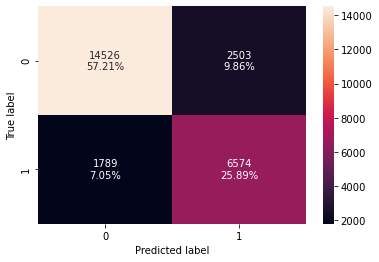

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(
    estimator, X_train, y_train
)  ##  create confusion matrix for train data

In [108]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)  ##  check performance ontrain data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


<IPython.core.display.Javascript object>

#### Checking performance on test set

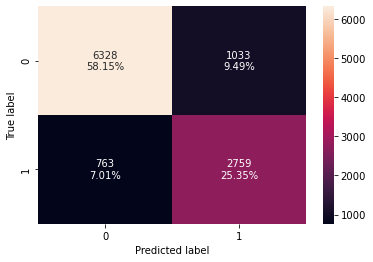

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(
    estimator, X_test, y_test
)  ##  create confusion matrix for test data

In [110]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test ##  check performance on test set


,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


<IPython.core.display.Javascript object>

### Visualizing the  Decision Tree

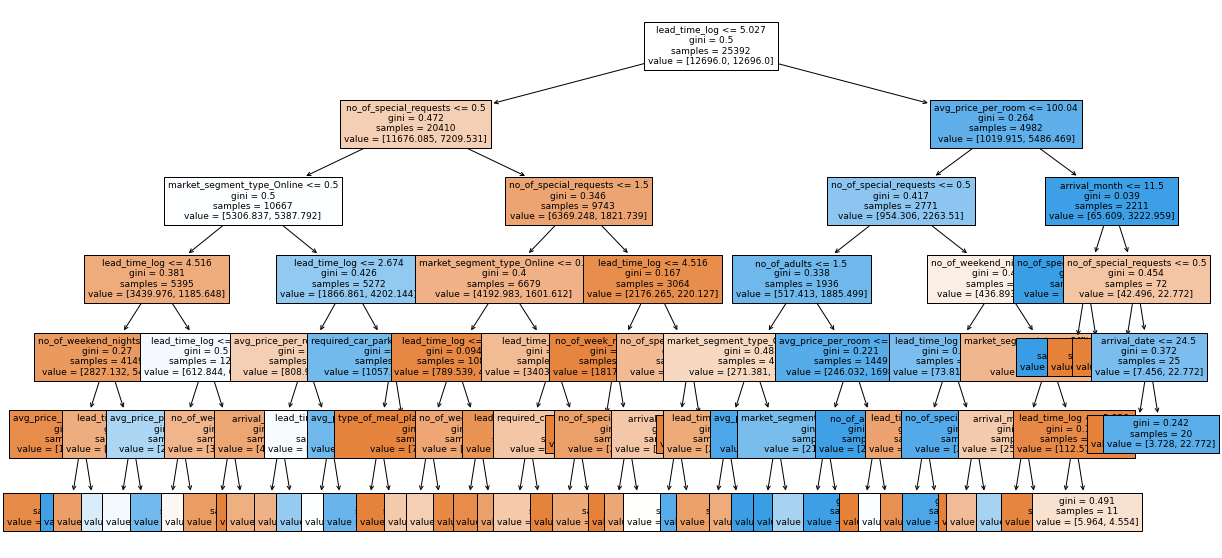

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [112]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_log <= 5.03
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_log <= 4.52
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time_log <= 4.24
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time_log >  4.24
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time_log >  4.52
|   |   |   |   |--- lead_time_log <= 4.77
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: 

<IPython.core.display.Javascript object>

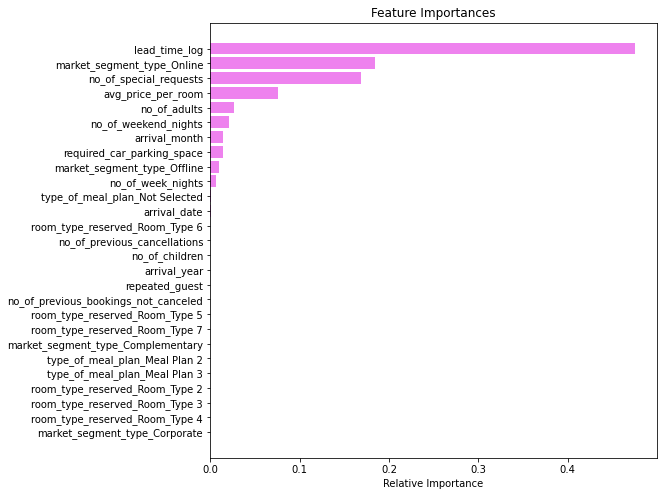

<IPython.core.display.Javascript object>

In [113]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [114]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [115]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1897,0.00890,0.32806
1898,0.00980,0.33786
1899,0.01272,0.35058
1900,0.03412,0.41882


<IPython.core.display.Javascript object>

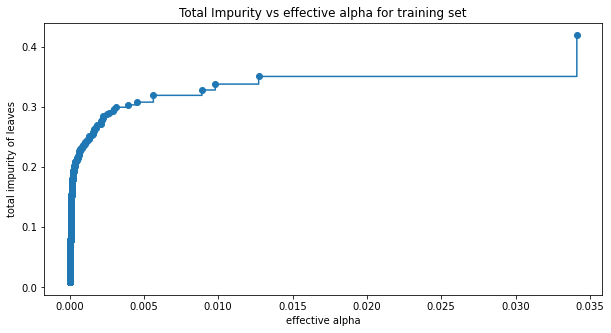

<IPython.core.display.Javascript object>

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [117]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137004


<IPython.core.display.Javascript object>

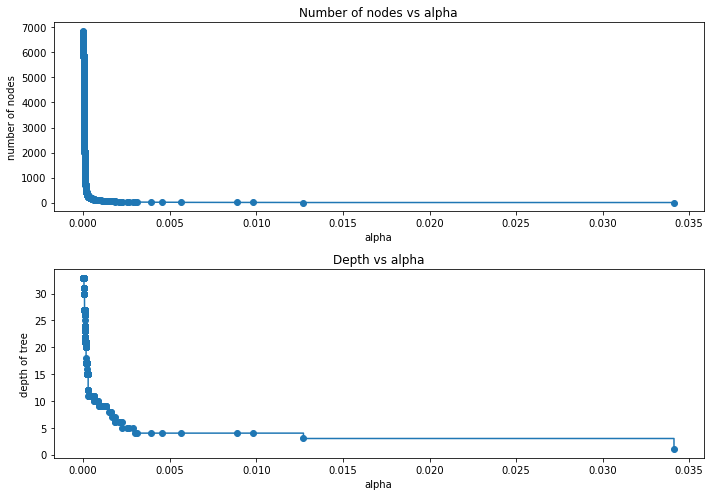

<IPython.core.display.Javascript object>

In [118]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [119]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

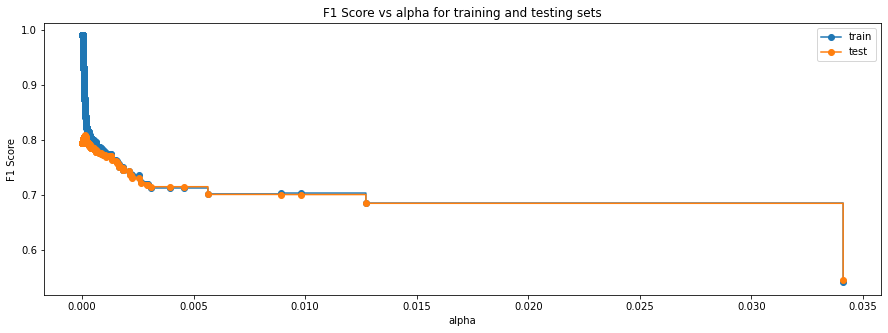

<IPython.core.display.Javascript object>

In [120]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [121]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013338844575845268,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

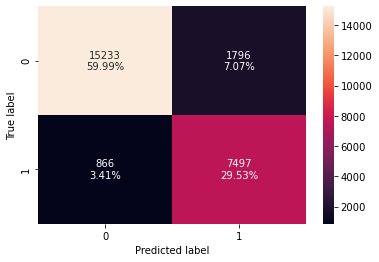

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [123]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89516,0.89645,0.80674,0.84923


<IPython.core.display.Javascript object>

#### Checking performance on test set

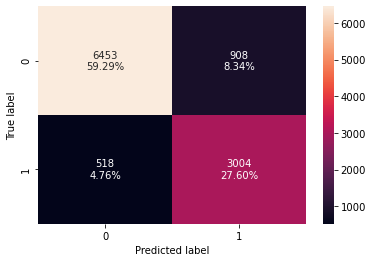

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(
    best_model, X_test, y_test
)  ## create confusion matrix for test data on best model

In [125]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)  ##  check performance of test set on best model
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86897,0.85292,0.76789,0.80818


<IPython.core.display.Javascript object>

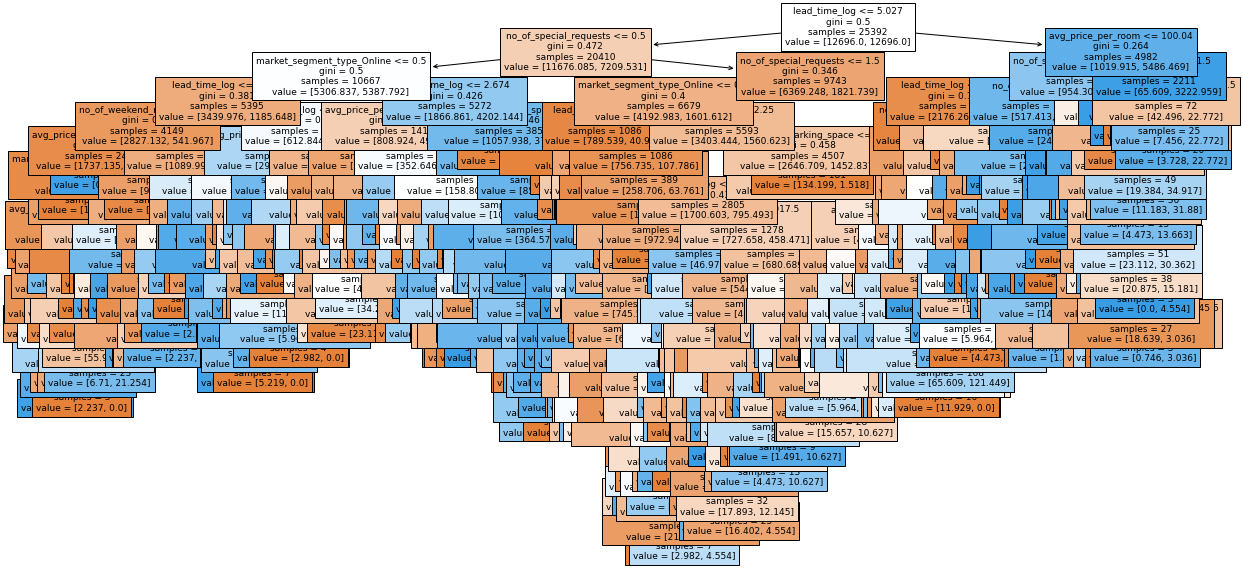

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [127]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time_log <= 5.03
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_log <= 4.52
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time_log <= 2.86
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |

<IPython.core.display.Javascript object>

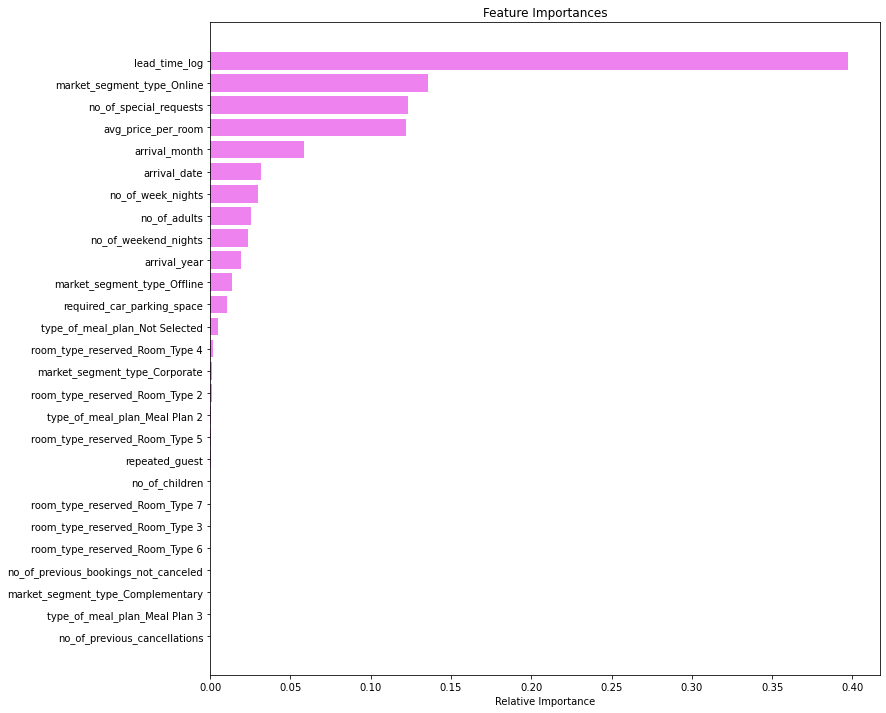

<IPython.core.display.Javascript object>

In [128]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing Decision Tree models

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89516
Recall,0.98661,0.78608,0.89645
Precision,0.99578,0.72425,0.80674
F1,0.99117,0.75390,0.84923


<IPython.core.display.Javascript object>

In [130]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87219,0.83497,0.86897
Recall,0.81090,0.78336,0.85292
Precision,0.79754,0.72758,0.76789
F1,0.80417,0.75444,0.80818


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest F1 on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Actionable Insights and Recommendations

- The booking lead time, booking online and making special request are the top 3 factors that impact cancellations on bookings in that order.
- The price, arrival month and date, as well as the number of nights and adults can affect the booking status 
- What profitable policies for cancellations and refunds can the hotel adopt?
    - Bookings that have been made earlier on (high lead time) should be charged cancellation fee if cancelled
    - Bookings with special requets should be treated with high priority as this can turn them to repeated guests
- What other recommedations would you suggest to the hotel?
    - The hotel websites should be properly maintained and make easier to use and navigate since the majority of their bookings come from online market segments
    - During the peak months (August, September and especially October) the hotel should be prepared to provide top notch services.